In [1]:
from enum import Enum
from enum import IntEnum
from random import *
import numpy as np
import math
import random
random.seed(3)

In [2]:
# card Enum for playing cards
# shows the value/rank of the cards
# 2 is the weakest, Ace is the strongest
class Card(IntEnum):
    TWO = -6
    THREE = -5
    FOUR = -4
    FIVE = -3
    SIX = -2
    SEVEN = -1
    EIGHT = 0
    NINE = 1
    TEN = 2
    JACK = 3
    QUEEN = 4
    KING = 5
    ACE = 6

#Suit enum for playing cards
class Suit(Enum):
    SPADES = 'spades'
    CLUBS = 'clubs'
    HEARTS = 'hearts'
    DIAMONDS = 'diamonds'

In [3]:
# Playing card class
# Class to hold info for playing card
class PlayingCard:
    def __init__(self, card_value, card_suit):
        self.card = card_value
        self.suit = card_suit

# Function to deal a full deck of cards
def create_deck():
 # Adding Cards into deck
    for suit in Suit:
        for card in Card:
            full_deck.append(PlayingCard(Card(card), Suit(suit)))
    return full_deck

#return a random card from deck(inclusive)
# Draw single card from deck
def draw_card(deck):
    rand_card = randint(0, len(deck) - 1)
    return deck.pop(rand_card)

# take the specified number and store all 4 into a container("RIGGED" deal)
def take_four(deck):
    fourCard_deck = [] # holder for the cards specifically asked for :)
    #cardVal = int(input("SPECIFY WHICH rank card you want to remove, ex2, 3,...J(11),...,A(14):")) # get scanner
    cardIndex = (14 - 2) #cardVal - 2) # get the starting index
    while(cardIndex < len(deck)):#go through partial deck 
        # In this part I will append the card I find into fourCard Deck
        fourCard_deck.append(deck.pop(cardIndex))#appen each out of those card from partial deck into some player
        cardIndex += 12
    return fourCard_deck

# Deal two players for the game of war(regular deal)
def deal_war():
    while(len(partial_deck) > 0):
        player1_cards.append(draw_card(partial_deck))
        player2_cards.append(draw_card(partial_deck))    
        
# Deals the all aces to player 1        
def deal_player1_four():
    # Extend all the aces to player1's cards
    fourCards = take_four(partial_deck)
    player1_cards.extend(fourCards)
    while(len(partial_deck) > 0):
        player1_cards.append(draw_card(partial_deck))
        player2_cards.append(draw_card(partial_deck))
    player2_cards.append(player1_cards.pop(27))
    player2_cards.append(player1_cards.pop(26))
    #shuffle p1 & p2
    random.shuffle(player1_cards)
    random.shuffle(player2_cards)
    
def deal_player2_four():
    # Extend all the aces to player2's cards
    fourCards = take_four(partial_deck)
    player2_cards.extend(fourCards)
    while(len(partial_deck) > 0):
        player1_cards.append(draw_card(partial_deck))
        player2_cards.append(draw_card(partial_deck))
    player1_cards.append(player2_cards.pop(27))
    player1_cards.append(player2_cards.pop(26))
    #shuffle p1 & p2
    random.shuffle(player1_cards)
    random.shuffle(player2_cards)# class to hold information for playing cards
# this is the actual playing card object(has a rank, suit)
class PlayingCard:
    def __init__(self, card_value, card_suit):
        self.card = card_value
        self.suit = card_suit

In [4]:
# This function will look append all the cards to the winner
def player_1_wins():
    player_1_topCard = player1_cards.pop(0) # pop the first index for player 1 (current)
    player_2_topCard = player2_cards.pop(0) # same for player 2  
    card_in_play = [player_1_topCard, player_2_topCard]# create a list that you will EXTEND into player 1(the winning player)
    # NOTE: I am adding the winning card first
    player1_cards.extend(card_in_play[0:2]) # extends the contents of card_in_play range of 0 and anything before 2
    

def player_2_wins():
    player_1_topCard = player1_cards.pop(0) # pop the first index for player 1 (current)
    player_2_topCard = player2_cards.pop(0) # same for player 2
    card_in_play = [player_2_topCard, player_1_topCard]# create a list that you will EXTEND into player 2(the winning player)
    # NOTE: I am adding the winning card first
    player2_cards.extend(card_in_play[0:2]) # extends the contents of card_in_play range of 0 and anything before 2

In [5]:
def p1_war(num_O_cards):
    card_in_play = []
    i = 0
    j = 0
    for i in range (num_O_cards):
        card_in_play.append(player1_cards.pop(0))
    for j in range(num_O_cards): 
        card_in_play.append(player2_cards.pop(0))
        
    #for i in range(0, len(card_in_play)):
        #card1 = card_in_play[i].card
        #print("card in play ", card1)
        
    player1_cards.extend(card_in_play[0:])

def p2_war(num_O_cards):
    card_in_play = []
    i = 0
    j = 0
    for i in range (num_O_cards):
        card_in_play.append(player2_cards.pop(0))
    for j in range(num_O_cards): 
        card_in_play.append(player1_cards.pop(0))  
        
    #for i in range(0, len(card_in_play)):
        #card1 = card_in_play[i].card
        #print("card in play ", card1)
        
    player2_cards.extend(card_in_play[0:])

In [6]:
# Advatage War Function
#This occurs when one player does not have enought to finish a war 4, 8, 12, 16, 20, 24
def advantage_war(advantageWar_state):#input which advatage WAR it is adwar 1 -> 4, adwar 2 -> 8
    temp = []
    Number_of_cardsLeft = advantageWar_state
    # this checks when a deck has 1 card and it enters a war,
    if(len(player1_cards) == 1): # if play1 has only 1 card left\n",
        if((player1_cards[0].card == player2_cards[0].card) or (player1_cards[0].card < player2_cards[0].card)): # and if both player draw == ranks (causing a war)
                                                      # or when player player 1's last card wins
            player_2_wins()
        else:
            player_1_wins()
            
    elif(len(player2_cards) == 1): # if player 2 has 1 card left 
        if((player1_cards[0].card == player2_cards[0].card) or (player1_cards[0].card > player2_cards[0].card)): # both cards drawn are even ranks
            player_1_wins()
        else:
            player_2_wins()
 
    else:
        if(len(player1_cards) <= Number_of_cardsLeft ): # if p1's deck is 4 or less
            preLev = len(player1_cards)            
            for i in range(len(player1_cards)):
                temp.append(player1_cards.pop(0)) # append all cards into temp, except the last one
            for i in range(preLev ):
                temp.append(player2_cards.pop(0)) # append all card same size as s pl into temp
            player2_cards.extend(temp[0:])
            
        if(len(player2_cards) <= Number_of_cardsLeft ):
            preLev = len(player2_cards)
            #print("preLev",preLev)
            for i in range(len(player2_cards)):
                temp.append(player2_cards.pop(0))
            for i in range(preLev):
                temp.append(player1_cards.pop(0)) 
            player1_cards.extend(temp[0:])

In [7]:
'''for i in range(0, len(player1_cards)):
    card1 = player1_cards[i].card
    cardSuit = player1_cards[i].suit
    print("player1's deck", card1)
    #print("suit", cardSuit)

for i in range(0, len(player2_cards)):
    card2 = player2_cards[i].card
    print("player2's deck", card2)
'''

'for i in range(0, len(player1_cards)):\n    card1 = player1_cards[i].card\n    cardSuit = player1_cards[i].suit\n    print("player1\'s deck", card1)\n    #print("suit", cardSuit)\n\nfor i in range(0, len(player2_cards)):\n    card2 = player2_cards[i].card\n    print("player2\'s deck", card2)\n'

In [8]:

# hand stength Calculator
#full_deck = [] # this will be the original ordered deck
#partial_deck = [] # to make sure you don't mess with the original ordered deck # keeps track of the remaining cards
#player1_cards = [] # player1's hand
#player2_cards = [] # player2's hand

#create_deck()
#partial_deck = list(full_deck)
#deal_war()
#deal_player1_four()
# checks the value of the starting hand
#p1Str = 0

#for i in range(0, len(player1_cards)):
    #p1Str = p1Str + player1_cards[i].card
    #print("some p1 ", player1_cards[i].card)
#p2Str = 0   
#for i in range(0, len(player2_cards)):
    #p2Str = p2Str + player2_cards[i].card
    #print("some p2 ", player2_cards[i].card)

#print("p1 start Strength", p1Str)
#print("p2 start strength", p2Str)


In [9]:
# Dictionary of each advatange, 
# the key is the Initial advantage(some int IA ), the value is a list ( containing 1's and o's). 1 = win, 0 = loss
#dictionary of Initial Advantages logging their wins and losses
dictIA = { 
    -26 : [],-25 : [],-24 : [],-23 : [],-22 : [],-21 : [],-20 : [],
    -19 : [],-18 : [],-17 : [],-16 : [],-15 : [],-14 : [],-13 : [],-12 : [],-11 : [],-10 : [],
     -9 : [], -8 : [], -7 : [], -6 : [], -5 : [], -4 : [], -3 : [], -2 : [], -1 : [],  
    
    
     0 : [], 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : [],
    10 : [],11 : [],12 : [],13 : [],14 : [],15 : [],16 : [],17 : [],18 : [],19 : [],
    20 : [],21 : [],22 : [],23 : [],24 : [],25 : [],26 : []}
print(dictIA)

{-26: [], -25: [], -24: [], -23: [], -22: [], -21: [], -20: [], -19: [], -18: [], -17: [], -16: [], -15: [], -14: [], -13: [], -12: [], -11: [], -10: [], -9: [], -8: [], -7: [], -6: [], -5: [], -4: [], -3: [], -2: [], -1: [], 0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: []}


In [10]:
dict_WarsFreq = {} 
[dict_WarsFreq.setdefault(x, []) for x in range(1, 8)]
print(dict_WarsFreq)

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}


In [11]:
def warGame():
    global total_skirmishes_and_wars_pergame
    global p1Ad
    global p2Ad
    skirmish = 0
    Single_War = 0
    Double_War = 0
    Triple_War = 0
    Quadruple_War = 0
    Pentuple_War = 0
    Sextuple_War = 0
    Septuple_war = 0
    
    war_bef_ad_reg = 0
    matchGameCount = 0
    
    
    p1InitialLastCard = player1_cards[25]
    p2InitialLastCard = player2_cards[25]
    
    p1TrueAD = 0 
    p2TrueAD = 0
    p2Ad = 0
    p1Ad = 0
    
    while((p1InitialLastCard in player1_cards) and (p2InitialLastCard in player2_cards)):
        matchGameCount += 1
        if(player1_cards[0].card > player2_cards[0].card): # if player one's top card is stronger
            p1Ad = p1Ad + 1
            #print("Player 1 wins the hand with", player1_cards[0].card)
            #print("Player 2 loses with", player2_cards[0].card)
            skirmish += 1
            player_1_wins() #calls player_1_wins() function\n",

        elif(player1_cards[0].card < player2_cards[0].card): # else if the 2nd player's top card is stronger 
            p2Ad = p2Ad + 1
            #print("Player  2 wins the hand with", player2_cards[0].card)
            #print("Player 1 loses the hand with", player1_cards[0].card)
            skirmish += 1
            player_2_wins() # calls the function player_2_wins

        else:# WAR CONDITION(both player 1 and player 2 has equal rank top card)
            #print("WAR before ad or reg")
            war_bef_ad_reg += 1
            if(len(player1_cards) > 4 and len(player2_cards) > 4):
                if(player1_cards[4].card > player2_cards[4].card):
                    p1Ad = p1Ad + 1
                    Single_War += 1
                    p1_war(5)

                elif(player1_cards[4].card < player2_cards[4].card):
                    p2Ad = p2Ad + 1
                    Single_War += 1
                    p2_war(5)

                else:
                    #print("2nd WARR")
                    #Single_War += 1
                    if(len(player1_cards) > 8 and len(player2_cards) > 8):
                        if(player1_cards[8].card > player2_cards[8].card):
                            p1Ad = p1Ad + 1
                            Double_War += 1
                            p1_war(9)

                        elif(player1_cards[8].card < player2_cards[8].card):
                            p2Ad = p2Ad + 1
                            Double_War += 1
                            p2_war(9)

                        else:
                            #print("3rd WARRR")
                            #Double_War += 1
                            if(len(player1_cards) > 12 and len(player2_cards) > 12):
                                if(player1_cards[12].card > player2_cards[12].card):
                                    p1Ad = p1Ad + 1
                                    Triple_War += 1
                                    p1_war(13)

                                elif(player1_cards[12].card < player2_cards[12].card):
                                    p2Ad = p2Ad + 1
                                    Triple_War += 1
                                    p2_war(13)

                                else:
                                    #print("4th WARRRR ")
                                    #Triple_War += 1
                                    if(len(player1_cards) > 16 and len(player2_cards) > 16):
                                        if(player1_cards[16].card > player2_cards[16].card):
                                            p1Ad = p1Ad + 1
                                            Quadruple_War += 1
                                            p1_war(17)

                                        elif(player1_cards[16].card < player2_cards[16].card):
                                            p2Ad = p2Ad + 1
                                            Quadruple_War += 1
                                            p2_war(17)

                                        else:
                                            #print("5th WARRRRR IA")
                                            
                                            p1Ad = p1Ad + 1
                                            p2Ad = p2Ad + 1
                                            #Fourth_War += 1
                                            if(len(player1_cards) > 20 and len(player2_cards) > 20):
                                                if(player1_cards[20].card > player2_cards[20].card):
                                                    Pentuple_War += 1
                                                    p1Ad = p1Ad + 1
                                                    p1_war(21)

                                                elif(player1_cards[20].card < player2_cards[20].card):
                                                    Pentuple_War += 1
                                                    p2Ad = p2Ad + 1
                                                    p2_war(21)

                                                else:
                                                    print("6th WARRR IA")
                                                    #Pentuple_War += 1
                                                    if(len(player1_cards) > 24 and len(player2_cards) > 24):
                                                        if(player1_cards[24].card > player2_cards[24].card):
                                                            Sextuple_War += 1
                                                            p1Ad = p1Ad + 1
                                                            p1_war(25)

                                                        elif(player1_cards[24].card < player2_cards[24].card):
                                                            Sextuple_War += 1
                                                            p2Ad = p2Ad + 1
                                                            p2_war(25)
                                                            
                                                        else:
                                                            Septuple_war += 1
                                                            print("7th WARRR not IMPLEMENTED")
                                                            print("call the skirmish since there would only be 1 card at this point")
                                                            print("SEPTUPLEEEEEEEE WARRRRRRR YOOOOOOOOOOO")
                                                            print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                                                            break
                                                    else:
                                                        print("ad war 6")
                                                        advantage_war(24)
                                            else:
                                                #print("ad war 5")
                                                advantage_war(20)
                                    else:
                                        #print("ad war 4")
                                        advantage_war(16)
                            else:
                                #print("ad war 3")
                                advantage_war(12)
                    else:
                        #print("ad war 2")
                        advantage_war(8)
            else:
                #print("ad war 1")
                advantage_war(4)
        
    while(len(player1_cards) != 0 and len(player2_cards) != 0 ):
        matchGameCount += 1
        #print("p1 deck",len(player1_cards))
        #print("p2 deck",len(player2_cards))
        if(player1_cards[0].card > player2_cards[0].card): # if player one's top card is stronger
            #print("Player 1 wins the hand with", player1_cards[0].card)
            #print("Player 2 loses with", player2_cards[0].card)
            skirmish += 1
            player_1_wins() #calls player_1_wins() function\n",

        elif(player1_cards[0].card < player2_cards[0].card): # else if the 2nd player's top card is stronger 
            #print("Player  2 wins the hand with", player2_cards[0].card)
            #print("Player 1 loses the hand with", player1_cards[0].card)
            skirmish += 1
            player_2_wins() # calls the function player_2_wins

        else:# WAR CONDITION(both player 1 and player 2 has equal rank top card)
            #print("WAR before ad or reg")
            war_bef_ad_reg += 1
            if(len(player1_cards) > 4 and len(player2_cards) > 4):
                if(player1_cards[4].card > player2_cards[4].card):
                    Single_War += 1
                    p1_war(5)

                elif(player1_cards[4].card < player2_cards[4].card):
                    Single_War += 1
                    p2_war(5)

                else:
                    #print("2nd WARR")
                    Single_War += 1
                    if(len(player1_cards) > 8 and len(player2_cards) > 8):
                        if(player1_cards[8].card > player2_cards[8].card):
                            Double_War += 1
                            p1_war(9)

                        elif(player1_cards[8].card < player2_cards[8].card):
                            Double_War += 1
                            p2_war(9)

                        else:
                            #print("3rd WARRR")
                            Double_War += 1
                            if(len(player1_cards) > 12 and len(player2_cards) > 12):
                                if(player1_cards[12].card > player2_cards[12].card):
                                    Triple_War += 1
                                    p1_war(13)

                                elif(player1_cards[12].card < player2_cards[12].card):
                                    Triple_War += 1
                                    p2_war(13)

                                else:
                                    #print("4th WARRRR ")
                                    Triple_War += 1
                                    if(len(player1_cards) > 16 and len(player2_cards) > 16):
                                        if(player1_cards[16].card > player2_cards[16].card):
                                            Quadruple_War += 1
                                            p1_war(17)

                                        elif(player1_cards[16].card < player2_cards[16].card):
                                            Quadruple_War += 1
                                            p2_war(17)

                                        else:
                                            #print("5th WARRRRR ")
                                            
                                            if(len(player1_cards) > 20 and len(player2_cards) > 20):
                                                if(player1_cards[20].card > player2_cards[20].card):
                                                    Pentuple_War += 1
                                                    p1_war(21)

                                                elif(player1_cards[20].card < player2_cards[20].card):
                                                    Pentuple_War += 1
                                                    p2_war(21)

                                                else:
                                                    #print("6th WARRR ")
                                                    #Fift_War += 1
                                                    if(len(player1_cards) > 24 and len(player2_cards) > 24):
                                                        if(player1_cards[24].card > player2_cards[24].card):
                                                            Sextuple_War += 1
                                                            p1_war(25)

                                                        elif(player1_cards[24].card < player2_cards[24].card):
                                                            Sextuple_War += 1
                                                            p2_war(25)

                                                        else:
                                                            Septuple_war += 1
                                                            print("7th WARRR not IMPLEMENTED")
                                                            print("call the skirmish since there would only be 1 card at this point")
                                                            print("SEPTUPLEEEEEEEE WARRRRRRR YOOOOOOOOOOO")
                                                            print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                                                            break
                                                    else:
                                                        #print("ad war 6")
                                                        advantage_war(24)
                                            else:
                                                #print("ad war 5")
                                                advantage_war(20)
                                    else:
                                        #print("ad war 4")
                                        advantage_war(16)
                            else:
                                #print("ad war 3")
                                advantage_war(12)
                    else:
                        #print("ad war 2")
                        advantage_war(8)
            else:
                #print("ad war 1")
                advantage_war(4) 
                
    total_skirmishes_and_wars_pergame.append(matchGameCount)#num of games
    
    p1TrueAD = p1Ad - p2Ad # p1 trueadvantage 
    p2TrueAD = p2Ad - p1Ad # p2 true advantage
    
    
    if(len(player1_cards) != 0):    
        #add 1 to the correct list
        #print("player 1 wins!")
        winnerArray.append(1)#store the number (for winner)
        dictIA[p1TrueAD].append(1) # add 1 to p1 ( win)
        dictIA[p2TrueAD].append(0) # add 0 to p1(lost)
    else:
        #add 0 to the correct list
        #print("player 2 wins!")
        winnerArray.append(2)#store the number (for winner)
        dictIA[p1TrueAD].append(0) # add a 0 to p1(lost)
        dictIA[p2TrueAD].append(1) # add 1 to p2 ( win)
    
    
    
    
    
    
    
    #print("p1: ", len(player1_cards))
    #print("p2: ", len(player2_cards))
    #print("skirmishes: ", skirmish)
    print("Single_Wars: ", Single_War)
    print("Double_War: ", Double_War)
    print("Triple_War: ", Triple_War)
    print("Quadruple_War: ", Quadruple_War)
    print("Pentuple_War: ", Pentuple_War)
    #print("war_bef_ad_reg: ", war_bef_ad_reg)
    #print("FINISHED")

In [12]:
gameCountAllMatches = 0

total_skirmishes_and_wars_pergame = [] # stores all the game counts

winnerArray = [] # stores who wins each round

for match in range(1, 500):
    full_deck = [] # this will be the original ordered deck
    partial_deck = [] # to make sure you don't mess with the original ordered deck # keeps track of the remaining cards
    player1_cards = [] # player1's hand
    player2_cards = [] # player2's hand

    create_deck()
    partial_deck = list(full_deck)
    #deal_war()
    deal_player1_four()
    
    warGame()
    gameCountAllMatches += 1
    print("current Match: ", gameCountAllMatches)
    print("*************************************************************")
print("gameCountAllMatches: ", gameCountAllMatches)

print("total number of matches", len(total_skirmishes_and_wars_pergame))
print("avg num of total_skirmishes_and_wars_pergame)", np.mean(total_skirmishes_and_wars_pergame))
print("Median of total_skirmishes_and_wars_pergame", np.median(total_skirmishes_and_wars_pergame))
print("Standard Dev of total_skirmishes_and_wars_pergame", np.std(total_skirmishes_and_wars_pergame))


Single_Wars:  5
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  1
*************************************************************
Single_Wars:  5
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  2
*************************************************************
Single_Wars:  3
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  3
*************************************************************
Single_Wars:  2
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  4
*************************************************************
Single_Wars:  14
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  5
*************************************************************
Single_Wars:  4
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  6
*************************************************************
Single_Wars:  10
Double_War:  0
T

Pentuple_War:  0
current Match:  78
*************************************************************
Single_Wars:  9
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  79
*************************************************************
Single_Wars:  14
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  80
*************************************************************
Single_Wars:  12
Double_War:  4
Triple_War:  1
Quadruple_War:  0
Pentuple_War:  0
current Match:  81
*************************************************************
Single_Wars:  8
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  82
*************************************************************
Single_Wars:  15
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  83
*************************************************************
Single_Wars:  5
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current 

current Match:  151
*************************************************************
Single_Wars:  13
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  152
*************************************************************
Single_Wars:  8
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  153
*************************************************************
Single_Wars:  4
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  154
*************************************************************
Single_Wars:  1
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  155
*************************************************************
Single_Wars:  6
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  156
*************************************************************
Single_Wars:  8
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  157
*

*************************************************************
Single_Wars:  21
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  240
*************************************************************
Single_Wars:  3
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  241
*************************************************************
Single_Wars:  9
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  242
*************************************************************
Single_Wars:  1
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  243
*************************************************************
Single_Wars:  9
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  244
*************************************************************
Single_Wars:  5
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  245
*********************

Quadruple_War:  0
Pentuple_War:  0
current Match:  326
*************************************************************
Single_Wars:  3
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  327
*************************************************************
Single_Wars:  20
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  328
*************************************************************
Single_Wars:  4
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  329
*************************************************************
Single_Wars:  37
Double_War:  3
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  330
*************************************************************
Single_Wars:  18
Double_War:  1
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  331
*************************************************************
Single_Wars:  16
Double_War:  0
Triple_War:  0
Quadruple_War:  0


Quadruple_War:  0
Pentuple_War:  0
current Match:  419
*************************************************************
Single_Wars:  4
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  420
*************************************************************
Single_Wars:  15
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  421
*************************************************************
Single_Wars:  5
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  422
*************************************************************
Single_Wars:  2
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pentuple_War:  0
current Match:  423
*************************************************************
Single_Wars:  4
Double_War:  1
Triple_War:  1
Quadruple_War:  0
Pentuple_War:  0
current Match:  424
*************************************************************
Single_Wars:  7
Double_War:  0
Triple_War:  0
Quadruple_War:  0
Pen

In [13]:
#print(dictIA_Winrate.values())
#print(dictIA_Winrate.keys())
#print(dictIA_Winrate.items())

In [14]:
#print(total_skirmishes_and_wars_pergame)

In [15]:
#print(winnerArray)
#np.sort(winnerArray)

In [16]:
# getting the points
# print("dictIA.get", dictIA.get(2))
# print(len(dictIA.get(0)))

In [17]:
# # Printing the Dictionary of Initil Advantages
# for key, value in dictIA.items() :
#     print (key, value)
    
# # checking the symmetry of the initial advantage( in this case) the initial advantage WR of -1(50%) + 1 (50%) = 100%
# # this goes on with -4 at approx(46%) + 4(53%) = 99%approx

# # why are even Initial advantage occurs more than odd
# # WHY are odd Initial Advatages occur LESS than EVEN IA 
#     # change the scale?
#     # how it's coded?

In [18]:
#ar = [9,15]
#np.std(ar)
# n = 2
# std = 3
#SE = std/sqr(n)

In [19]:
#numGamesGivenIA = []
#winPercentages = [] # list of win percentages for each IA
# goess through the dictionary looking at the values(wins-losses) of each key(IA)
decimal = 0
numWins = 0

# copy dictIA as dictIA_Winrate
dictIA_Winrate = dict(dictIA) # this is a dictionary that carries Initial Advantage and their winrates2

for key, winsLosses in dictIA.items():
    print("Current Initial Advantage:", key,"Number of games", len(winsLosses)) # prints the number of games in the given IA
    print("winsLosses of current IA", winsLosses )
    
    # checks for win percentage at each Initial advantage
    # goes through the list of wins and losses at each key(IA),
    # then adds 1 to the number of wins if it's a 1
    for wins in winsLosses:
        if (wins == 1):
            numWins += 1
    print("numbers of wins, current IA", key,":", numWins)
    
    
    #print("len of list", len(winsLosses))
    #print(len(dictIA.get(2))) 
    if(len(winsLosses) != 0):
        decimal =  numWins / len(winsLosses)
        
    
    print("win percentage :", format( decimal,"%"))
    #winPercentages.append(format( decimal,"2%"))
    
    print("win percentage(decimal) :", decimal)
    #winPercentages.append(decimal)
    #numGamesGivenIA.append(len(winsLosses))
    dictIA_Winrate[key] = decimal
    decimal = 0
    numWins = 0
    
#print(winPercentages)

Current Initial Advantage: -26 Number of games 0
winsLosses of current IA []
numbers of wins, current IA -26 : 0
win percentage : 0.000000%
win percentage(decimal) : 0
Current Initial Advantage: -25 Number of games 0
winsLosses of current IA []
numbers of wins, current IA -25 : 0
win percentage : 0.000000%
win percentage(decimal) : 0
Current Initial Advantage: -24 Number of games 0
winsLosses of current IA []
numbers of wins, current IA -24 : 0
win percentage : 0.000000%
win percentage(decimal) : 0
Current Initial Advantage: -23 Number of games 0
winsLosses of current IA []
numbers of wins, current IA -23 : 0
win percentage : 0.000000%
win percentage(decimal) : 0
Current Initial Advantage: -22 Number of games 0
winsLosses of current IA []
numbers of wins, current IA -22 : 0
win percentage : 0.000000%
win percentage(decimal) : 0
Current Initial Advantage: -21 Number of games 0
winsLosses of current IA []
numbers of wins, current IA -21 : 0
win percentage : 0.000000%
win percentage(decim

In [20]:
print(dictIA_Winrate)
for key, value in dictIA_Winrate.items():
    print(key, value)

{-26: 0, -25: 0, -24: 0, -23: 0, -22: 0, -21: 0, -20: 0, -19: 0, -18: 0.0, -17: 0, -16: 0.0, -15: 0, -14: 0.0, -13: 0, -12: 0.16666666666666666, -11: 0.0, -10: 0.0625, -9: 0.25, -8: 0.21818181818181817, -7: 0.18181818181818182, -6: 0.18461538461538463, -5: 0.2727272727272727, -4: 0.26373626373626374, -3: 0.5, -2: 0.3652173913043478, -1: 0.5, 0: 0.5, 1: 0.5, 2: 0.6347826086956522, 3: 0.5, 4: 0.7362637362637363, 5: 0.7272727272727273, 6: 0.8153846153846154, 7: 0.8181818181818182, 8: 0.7818181818181819, 9: 0.75, 10: 0.9375, 11: 1.0, 12: 0.8333333333333334, 13: 0, 14: 1.0, 15: 0, 16: 1.0, 17: 0, 18: 1.0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0}
-26 0
-25 0
-24 0
-23 0
-22 0
-21 0
-20 0
-19 0
-18 0.0
-17 0
-16 0.0
-15 0
-14 0.0
-13 0
-12 0.16666666666666666
-11 0.0
-10 0.0625
-9 0.25
-8 0.21818181818181817
-7 0.18181818181818182
-6 0.18461538461538463
-5 0.2727272727272727
-4 0.26373626373626374
-3 0.5
-2 0.3652173913043478
-1 0.5
0 0.5
1 0.5
2 0.6347826086956522
3 0.5
4 0.73

In [21]:
# This are the Initial Advantage Keys from Initial Advatage Dictionary, accessed using .keys() method
#print(list(dictIA_Winrate.keys()))


In [22]:
# This are the Winrate Values from Initial Advatage Dictionary, accessed using .values() method
#print(list(dictIA_Winrate.values()))


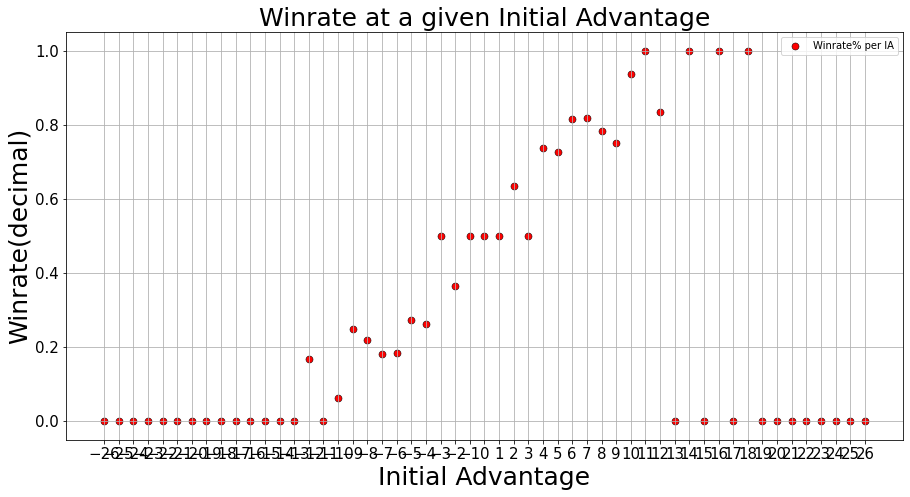

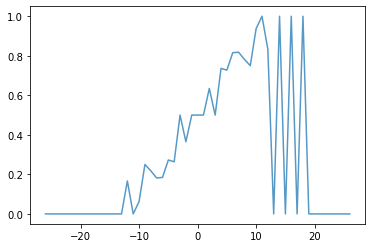

In [49]:
import matplotlib.pyplot as plt

Initial_Advantage_Array = list(dictIA_Winrate.keys())
Win_Percentages_Array = list(dictIA_Winrate.values())

plt.figure(figsize=(15,7.5)) #instead of making my axes limits the same, this 
                          # is trying to make the output dimensions of the figure square
#plt.scatter(initialAdArray,winPercentages, label='Winrate% per IA', color='red', s=10) # plots

plt.scatter(Initial_Advantage_Array,list(dictIA_Winrate.values()), label='Winrate% per IA', color='red',
            edgecolor = 'black', linewidth = .5, s=50) # plots
plt.grid()
plt.xticks(list(dictIA_Winrate.keys()), size = 15) # change the x-axis tick freq & size
plt.yticks(size = 15) # change the y-axis ticks freq & size
plt.xlabel('Initial Advantage', size = 25) # label of x axis
plt.ylabel('Winrate(decimal)', size = 25) # label of y axis
plt.title('Winrate at a given Initial Advantage', size = 25) # tittle of the whole graph
plt.legend(loc = 'best')#'best' puts the legend at the best spot ( legend is container containing ()'Winrate% per IA') )
#plt.set_figwidth(4)
#plt.set_figheight(1)
plt.show()
plt.plot(Initial_Advantage_Array, Win_Percentages_Array, alpha=0.75)#line graph
#plt.show()

In [ ]:
# Finding the number of games at a given Initial Advantage
length_games_givenIA = []
for value in dictIA.values():
    length_games_givenIA.append(len(value))
    
print(length_games_givenIA)

In [ ]:
length_games_givenIA[27]

In [ ]:
# calculating standard error

# With error bars
# That shows several examples of error bars; you can just use the first one which has both upper and lower bounds.
# For starters, I'd like you to please calculate the "standard error" 
# On the win %, which will be +/- (win%/sqrt(num_of_matches)), 
# Where the num_of_matches is at that particular advantage.
# Then add those error bars to your plot and resend it please.

#print(numGamesGivenIA)
#print(winPercentages)

standardErrorArray = []
standardError = 0
counter = 0
for win_rate in Win_Percentages_Array: # loops 52 times
    print("length of games", length_games_givenIA[counter], "win rate", win_rate)
    #print(counter)
    
    
    if(math.sqrt(length_games_givenIA[counter]) == 0):# checks if there are no games, if not, ignore
        standardError = 0
        print("standardError",standardError)
    
    elif(counter < 26): # these are all the negative Initial Advantage
        standardError = (1 - win_rate) / (math.sqrt(length_games_givenIA[counter]))#(win%/sqrt(num_of_matches))
        print("standardError",standardError)
        
    else: # these are all the positive Initial Advantage
        standardError = (win_rate) / (math.sqrt(length_games_givenIA[counter]))#(win%/sqrt(num_of_matches))
        print("standardError",standardError)
        
    
    standardErrorArray.append(standardError)
    
    counter += 1
    
    
    
print(np.std(list(dictIA_Winrate.values())))
print(np.mean(list(dictIA_Winrate.values())))
print(len(list(dictIA_Winrate.values())))
standardErrorArray


In [ ]:
# print(standardErrorArray)

In [ ]:
# This are the Initial Advantage Keys from Initial Advatage Dictionary, accessed using .keys() method
print(list(dictIA_Winrate.keys()))
# This are the Winrate Values from Initial Advatage Dictionary, accessed using .values() method
print(list(dictIA_Winrate.values()))

In [ ]:
# plt.figure(figsize=(30,10)) 
plt.ylim(-.75,1.75)# zooms the data in and out
plt.xlim(-26,26)
yerr = standardErrorArray


plt.scatter(Initial_Advantage_Array, Win_Percentages_Array, label='Winrate% per IA', color='red', s=10) 
plt.errorbar(Initial_Advantage_Array, Win_Percentages_Array, yerr= yerr, fmt = ' ', )#uplims=True)

#plt.errorbar(initialAdArray, winPercentages, yerr=yerr, uplims=True, label='uplims=True')

#plt.errorbar(initialAdArray, winPercentages, yerr=yerr, uplims=True, lolims=True,
             #label='uplims=True, lolims=True')
#upperlimits = [True, False] * 5
#lowerlimits = [False, True] * 5
#plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             #label='subsets of uplims and lolims')

plt.xlabel('Initial Advantage') # label of x axis
plt.ylabel('Winrate(decimal)') # label of y axis
plt.title('Winrate at a given Initial Advantage') # tittle of the whole graph
plt.legend(loc='upper left')